In [2]:
!pip install TA-lib
import talib as ta

In [31]:
import datetime as dt
import talib as ta
import pandas_datareader.data as pdr
import pandas as pd
import numpy as np
from math import floor
import matplotlib.pyplot as plt

In [32]:
start=dt.datetime(2011,1,1)
end=dt.datetime(2014,12,31)
data=pdr.DataReader("GOOG","yahoo",start,end)
rsi=ta.RSI(data['Close'])

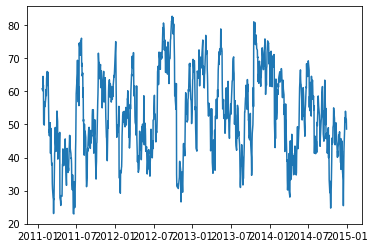

In [33]:
plt.plot(rsi)

In [34]:
def implement_rsi_strategy(prices, data):    
    buy_price = []
    sell_price = []
    rsi_signal = []
    signal = 0

    for i in range(len(rsi)):
        if rsi[i] <= 35:
            if signal != 1:
                buy_price.append(prices[i])
                sell_price.append(np.nan)
                signal = 1
                rsi_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                rsi_signal.append(0)
        elif rsi[i] >= 70:
            if signal != -1:
                buy_price.append(np.nan)
                sell_price.append(prices[i])
                signal = -1
                rsi_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                rsi_signal.append(0)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            rsi_signal.append(0)
            
    return buy_price, sell_price, rsi_signal
            
buy_price, sell_price, rsi_signal = implement_rsi_strategy(rsi, data)

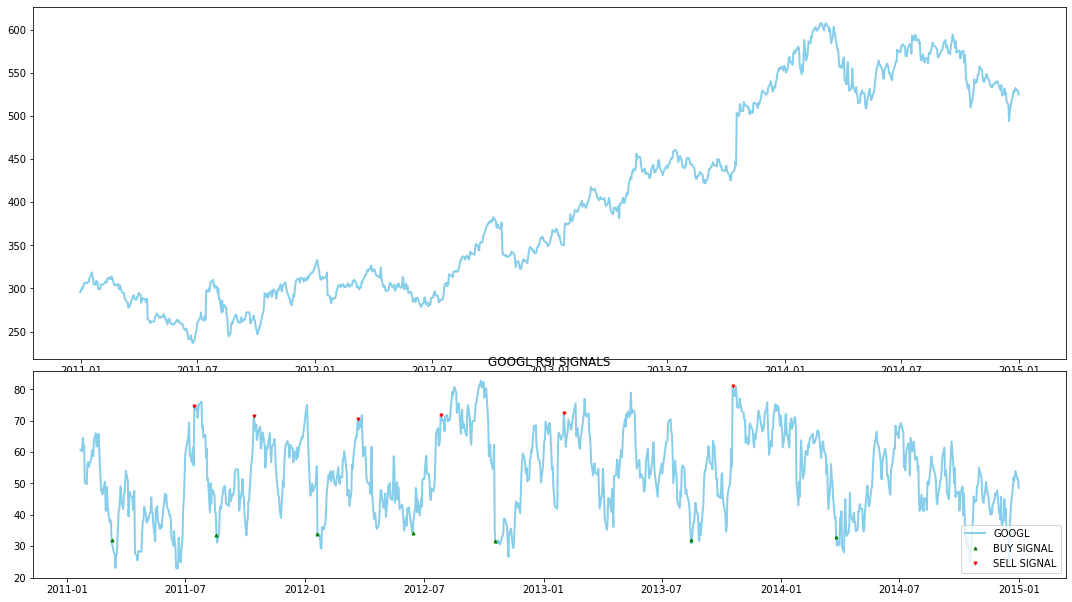

In [35]:
ax1 = plt.subplot2grid((8,1), (0,0), rowspan = 5, colspan = 1)

ax1.plot(data['Close'], color = 'skyblue', linewidth = 2, label = 'GOOGL')
ax2 = plt.subplot2grid((8,1), (5,0), rowspan = 5, colspan = 1)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5, forward=True)
ax2.plot(rsi, color = 'skyblue', linewidth = 2, label = 'GOOGL')
ax2.plot(data.index, buy_price, marker = '^', color = 'green', markersize = 3, label = 'BUY SIGNAL', linewidth = 0)
ax2.plot(data.index, sell_price, marker = 'v', color = 'r', markersize = 3, label = 'SELL SIGNAL', linewidth = 0)
ax2.legend()
ax2.set_title('GOOGL RSI SIGNALS')     
plt.legend(loc = 'lower right')
plt.show()


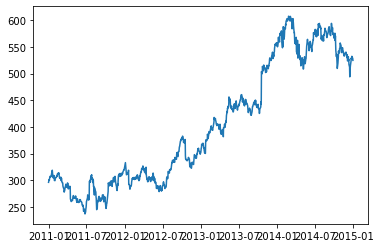

In [36]:

plt.plot(data['Close'])   


In [37]:
position = []
for i in range(len(rsi_signal)):
    if rsi_signal[i] != 1:
        position.append(0)
    else:
        position.append(1)
        
for i in range(len(data['Close'])):
    if rsi_signal[i] == 1:
        position[i] = 1
    elif rsi_signal[i] == -1:
        position[i] = 0
    else:
        position[i] = position[i-1]
        
RSI_d = rsi
O_price = data['Open']
rsi_signal = pd.DataFrame(rsi_signal).rename(columns = {0:'rsi_signal'}).set_index(data.index)
position = pd.DataFrame(position).rename(columns = {0:'rsi_position'}).set_index(data.index)

frames = [O_price, RSI_d, rsi_signal, position]
strategy = pd.concat(frames, join = 'inner', axis = 1)

strategy

,Open,0,rsi_signal,rsi_position
Date,,,,
2010-12-31,297.255798,NaN,0,0
2011-01-03,297.126312,NaN,0,0
2011-01-04,301.679230,NaN,0,0
2011-01-05,298.914581,NaN,0,0
2011-01-06,304.199799,NaN,0,0
...,...,...,...,...
2014-12-24,529.057495,50.779540,0,1
2014-12-26,527.322266,54.009608,0,1
2014-12-29,530.732849,51.451812,0,1


In [38]:
data_ret = pd.DataFrame(np.diff(data['Close'])).rename(columns = {0:'returns'})
rsi_strategy_ret = []

for i in range(len(data_ret)):
    try:
        returns = data_ret['returns'][i]*strategy['rsi_position'][i]
        rsi_strategy_ret.append(returns)
    except:
        pass
    
rsi_strategy_ret_df = pd.DataFrame(rsi_strategy_ret).rename(columns = {0:'rsi_returns'})

investment_value = 100000
number_of_stocks = floor(investment_value/data['Close'][0])
rsi_investment_ret = []

for i in range(len(rsi_strategy_ret_df['rsi_returns'])):
    returns = number_of_stocks*rsi_strategy_ret_df['rsi_returns'][i]
    rsi_investment_ret.append(returns)

rsi_investment_ret_df = pd.DataFrame(rsi_investment_ret).rename(columns = {0:'investment_returns'})
total_investment_ret = round(sum(rsi_investment_ret_df['investment_returns']), 2)
profit_percentage = floor((total_investment_ret/investment_value)*100)
print('Profit gained from the RSI strategy by investing ${} in GOOGL : ${}'.format(investment_value,total_investment_ret))
print('Profit percentage of the RSI strategy : {}%'.format(profit_percentage))

Profit gained from the RSI strategy by investing $100000 in GOOGL : $68412.88
Profit percentage of the RSI strategy : 68%


In [39]:
ma_signal.to_csv('Sipgnal.csv')